In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Social_Network_Ads.csv",usecols = [2,3,4])
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [7]:
x_train.shape, x_test.shape

((280, 2), (120, 2))

## **Using Standarization to scale the data**
### Standardization means applying Z-Score on the data to bring the complete data in the same range to operate ML algorithms

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scalar on x_train
scaler.fit(x_train)

# Transforming the training and test set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
x_train.head()

,Age,EstimatedSalary
259,45,131000
58,22,18000
201,49,74000
381,48,33000
270,43,133000


<Axes: ylabel='Density'>

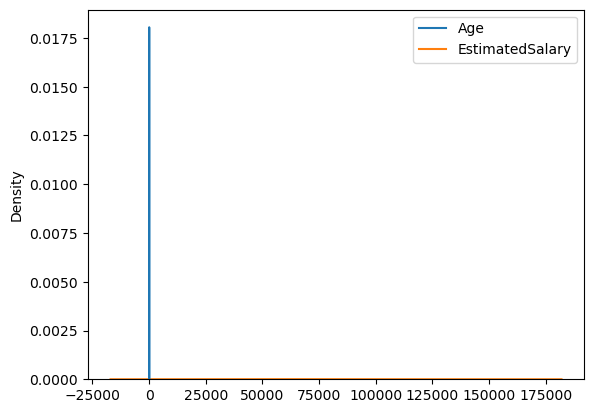

In [18]:
sns.kdeplot(x_train)

In [14]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_train_scaled.head()

,Age,EstimatedSalary
0,0.655391,1.823466
1,-1.476284,-1.613388
2,1.026117,0.089832
3,0.933435,-1.157168
4,0.470028,1.884295


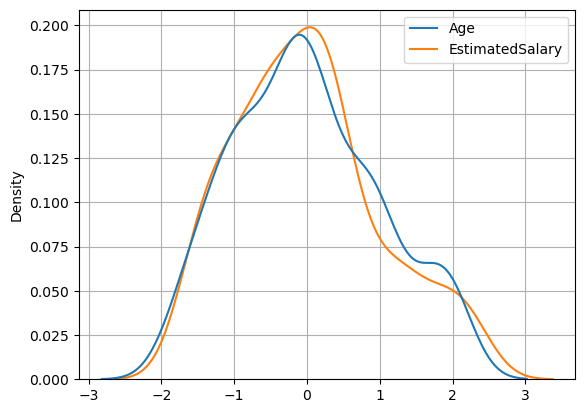

In [21]:
sns.kdeplot(x_train_scaled)
plt.grid()

In [16]:
np.round(x_train.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,37.93,71046.43
std,10.81,32937.78
min,18.00,15000.00
25%,29.00,47000.00
50%,37.00,71000.00
75%,46.00,88000.00
max,60.00,150000.00


In [17]:
np.round(x_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.85,-1.70
25%,-0.83,-0.73
50%,-0.09,-0.00
75%,0.75,0.52
max,2.05,2.40


Text(0.5, 1.0, 'After Scaling')

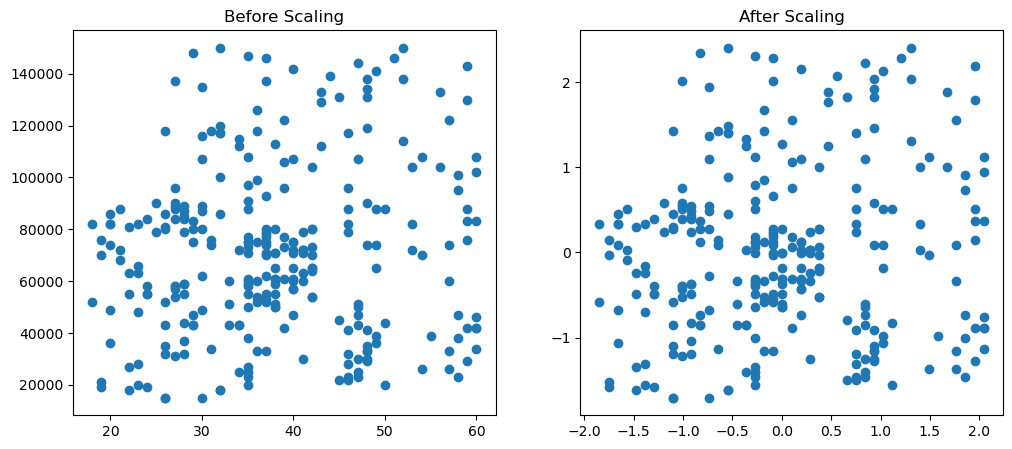

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')

## **Effect of outliers while standardization**


In [29]:
df2 = pd.DataFrame({'Age':[1,90,5], 'EstimatedSalary':[10000,1500000,20], 'Purchased':[0,1,0]})
df = pd.concat([df,df2], ignore_index=True)

In [30]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,1,10000,0
401,90,1500000,1


In [31]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scalar on x_train
scaler.fit(x_train)

# Transforming the training and test set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

Text(0.5, 1.0, 'After Scaling')

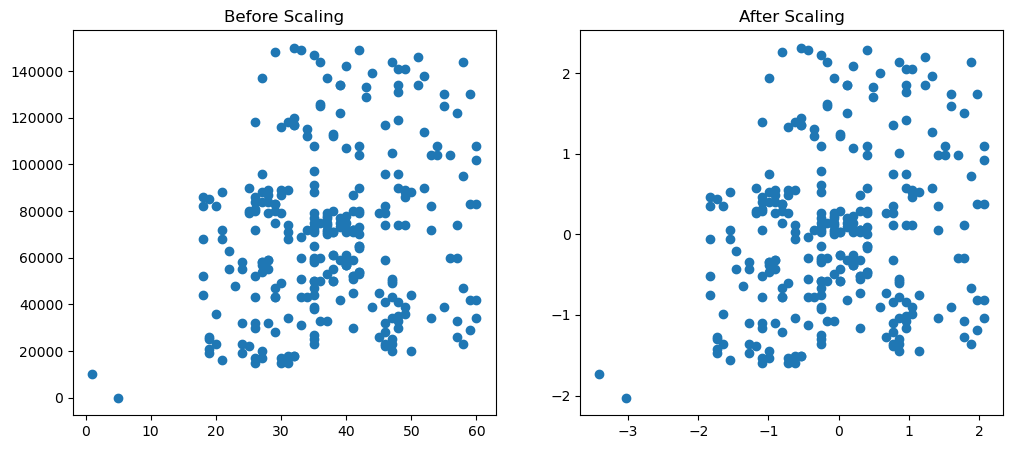

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2 , figsize = (12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')